In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [80]:
df_train = pd.read_csv('train_dataset.csv')
df_train.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,132.1180,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,69.966370,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,15.686361,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      6528 non-null   float64
 1   Present_Tmin      6528 non-null   float64
 2   LDAPS_RHmin       6524 non-null   float64
 3   LDAPS_RHmax       6524 non-null   float64
 4   LDAPS_Tmax_lapse  6524 non-null   float64
 5   LDAPS_Tmin_lapse  6524 non-null   float64
 6   LDAPS_WS          6524 non-null   float64
 7   LDAPS_LH          6524 non-null   float64
 8   LDAPS_CC1         6524 non-null   float64
 9   LDAPS_CC2         6524 non-null   float64
 10  LDAPS_CC3         6524 non-null   float64
 11  LDAPS_CC4         6524 non-null   float64
 12  LDAPS_PPT1        6524 non-null   float64
 13  LDAPS_PPT2        6524 non-null   float64
 14  LDAPS_PPT3        6524 non-null   float64
 15  LDAPS_PPT4        6524 non-null   float64
 16  lat               6589 non-null   float64


In [6]:
df_train.shape

(6589, 22)

In [14]:
df_train.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
dtype: object

In [7]:
df_train.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6528.000000,6528.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,...,6524.000000,6524.000000,6524.000000,6524.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6567.000000
mean,29.767203,23.217862,56.733485,88.375947,29.618749,23.514294,7.078863,62.607915,0.368274,0.356035,...,0.578082,0.479413,0.280178,0.273615,37.544970,126.991331,62.042712,1.254981,5342.443957,30.284102
std,2.983094,2.429038,14.643501,7.201419,2.949113,2.345499,2.151549,33.846639,0.263172,0.258348,...,1.919926,1.745113,1.169598,1.230588,0.050402,0.079562,54.485681,1.368080,429.247389,3.132548
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000
25%,27.800000,21.600000,45.957097,84.224436,27.662062,22.100277,5.681878,37.253107,0.145684,0.138993,...,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5004.824219,28.200000
50%,29.900000,23.400000,55.017689,89.798084,29.697722,23.763636,6.540526,56.871052,0.314975,0.313254,...,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5435.520020,30.500000
75%,32.000000,24.900000,67.205536,93.771591,31.729855,25.147837,7.990957,84.235666,0.574132,0.557710,...,0.049101,0.016580,0.007753,0.000000,37.577600,127.042000,59.832400,1.767800,5730.027832,32.700000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000


In [8]:
df_train.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [12]:
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

Present_Tmax        61
Present_Tmin        61
LDAPS_RHmin         65
LDAPS_RHmax         65
LDAPS_Tmax_lapse    65
LDAPS_Tmin_lapse    65
LDAPS_WS            65
LDAPS_LH            65
LDAPS_CC1           65
LDAPS_CC2           65
LDAPS_CC3           65
LDAPS_CC4           65
LDAPS_PPT1          65
LDAPS_PPT2          65
LDAPS_PPT3          65
LDAPS_PPT4          65
Next_Tmax           22
dtype: int64

In [52]:
df_train = df_train.fillna(df_train.mean())

In [53]:
df_train.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

In [13]:
df_train.duplicated().sum()

0

In [54]:
low_variance = df_train.loc[:, df_train.nunique() <= 1].columns.tolist()
print(f"Low variance (constant) columns: {low_variance}")

Low variance (constant) columns: []


In [55]:
sns.set_theme(style="whitegrid")

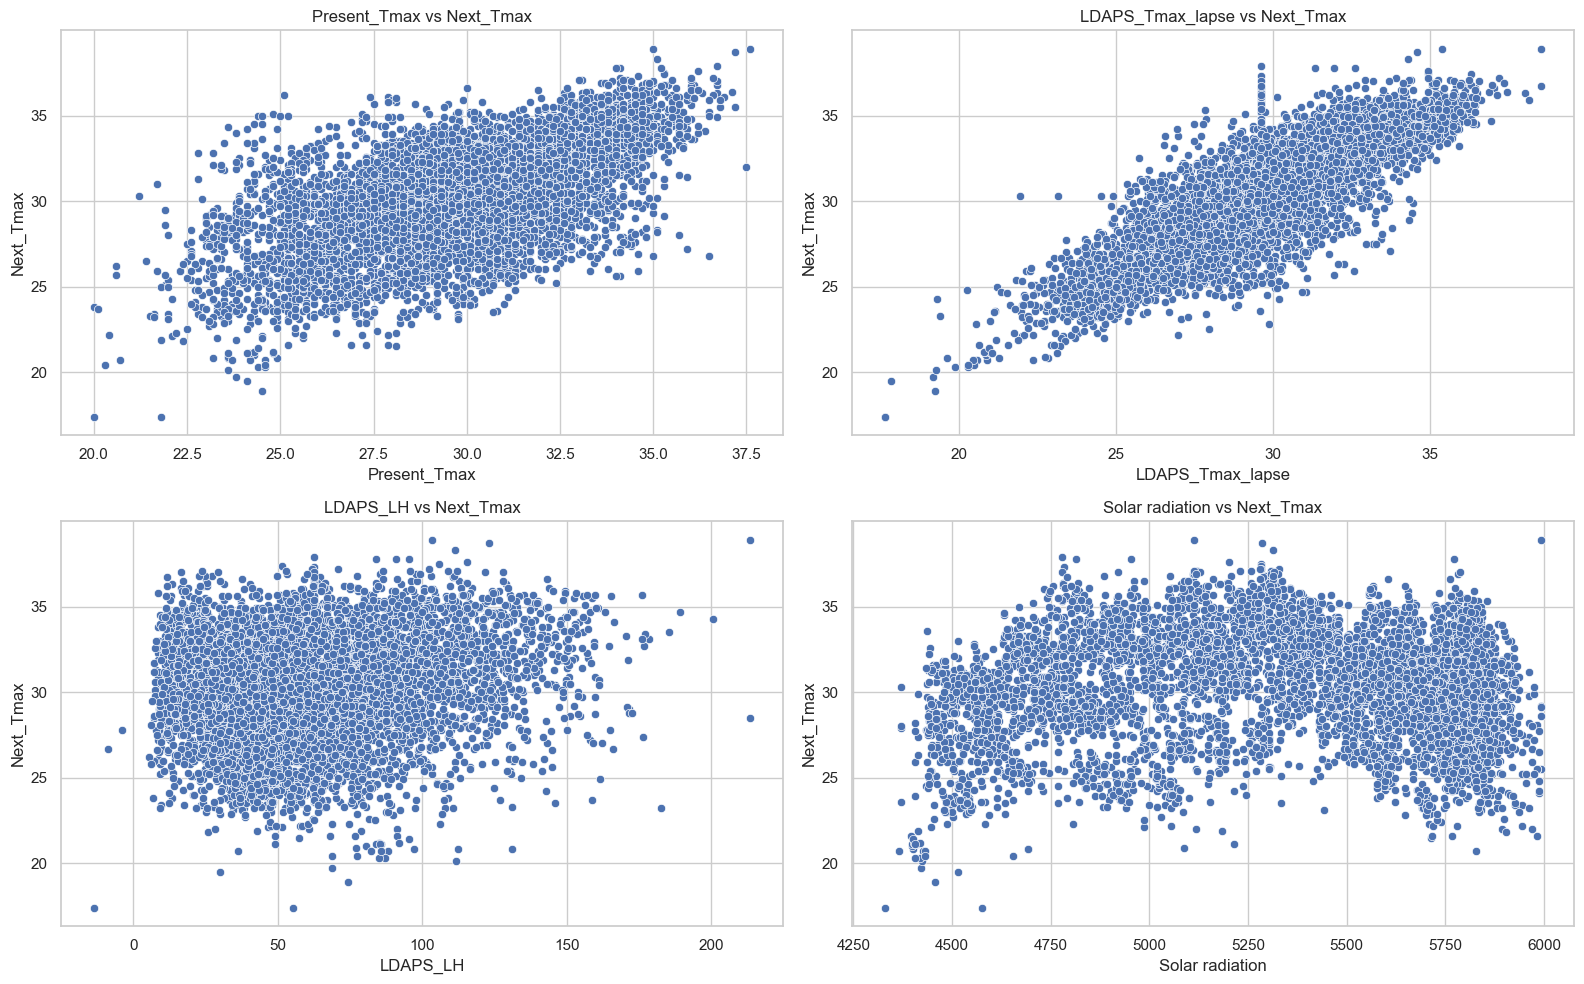

In [56]:
features_to_plot = ['Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_LH', 'Solar radiation']
plt.figure(figsize=(16,10))
for i,feature in enumerate(features_to_plot,1):
    plt.subplot(2,2,i)
    sns.scatterplot(x = feature,y='Next_Tmax',data = df_train)
    plt.title(f'{feature} vs Next_Tmax')
    plt.xlabel(feature)
    plt.ylabel('Next_Tmax')
plt.tight_layout()
plt.show()

In [57]:
corr = df_train.corr()
corr

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
Present_Tmax,1.000000,0.617641,-0.202560,-0.296498,0.569862,0.622734,-0.115937,0.141031,-0.310000,-0.214789,...,-0.103011,-0.094525,-0.118567,-0.100292,-0.050052,0.013212,-0.190264,-0.100202,-0.027621,0.610895
Present_Tmin,0.617641,1.000000,0.125573,-0.011244,0.467801,0.764749,-0.039061,-0.003514,0.087613,0.091857,...,0.117330,0.074187,-0.041117,-0.066146,-0.083640,-0.038450,-0.254823,-0.142764,0.050962,0.478570
LDAPS_RHmin,-0.202560,0.125573,1.000000,0.578957,-0.560126,0.092447,0.280282,-0.076371,0.612246,0.746088,...,0.264141,0.392678,0.241015,0.165949,0.086897,-0.073272,0.101951,0.118251,0.248516,-0.432383
LDAPS_RHmax,-0.296498,-0.011244,0.578957,1.000000,-0.371869,-0.111858,0.124605,0.236035,0.433980,0.391205,...,0.263955,0.227462,0.137192,0.120064,0.197759,0.025348,0.178485,0.218958,0.149053,-0.278374
LDAPS_Tmax_lapse,0.569862,0.467801,-0.560126,-0.371869,1.000000,0.656094,-0.302015,0.053319,-0.434856,-0.520931,...,-0.108394,-0.240155,-0.189093,-0.157402,-0.039600,0.095184,-0.184173,-0.158446,0.047013,0.826738
LDAPS_Tmin_lapse,0.622734,0.764749,0.092447,-0.111858,0.656094,1.000000,-0.127486,-0.130782,0.014577,0.049656,...,0.043058,0.003927,-0.087622,-0.094439,-0.095959,-0.016574,-0.198895,-0.182172,0.160102,0.589059
LDAPS_WS,-0.115937,-0.039061,0.280282,0.124605,-0.302015,-0.127486,1.000000,0.008196,0.283050,0.254903,...,0.140473,0.182045,0.163392,0.138730,0.030033,-0.063148,0.187117,0.160051,0.117743,-0.337642
LDAPS_LH,0.141031,-0.003514,-0.076371,0.236035,0.053319,-0.130782,0.008196,1.000000,-0.152788,-0.271878,...,-0.018751,-0.082045,0.015613,0.019383,0.140682,0.018627,0.052920,0.085503,-0.052261,0.162670
LDAPS_CC1,-0.310000,0.087613,0.612246,0.433980,-0.434856,0.014577,0.283050,-0.152788,1.000000,0.780367,...,0.445859,0.390564,0.163294,0.080691,-0.011627,-0.003165,-0.016163,-0.027971,0.218311,-0.447820
LDAPS_CC2,-0.214789,0.091857,0.746088,0.391205,-0.520931,0.049656,0.254903,-0.271878,0.780367,1.000000,...,0.309335,0.479072,0.236709,0.153602,-0.000616,0.002964,-0.016253,-0.026926,0.172639,-0.485933


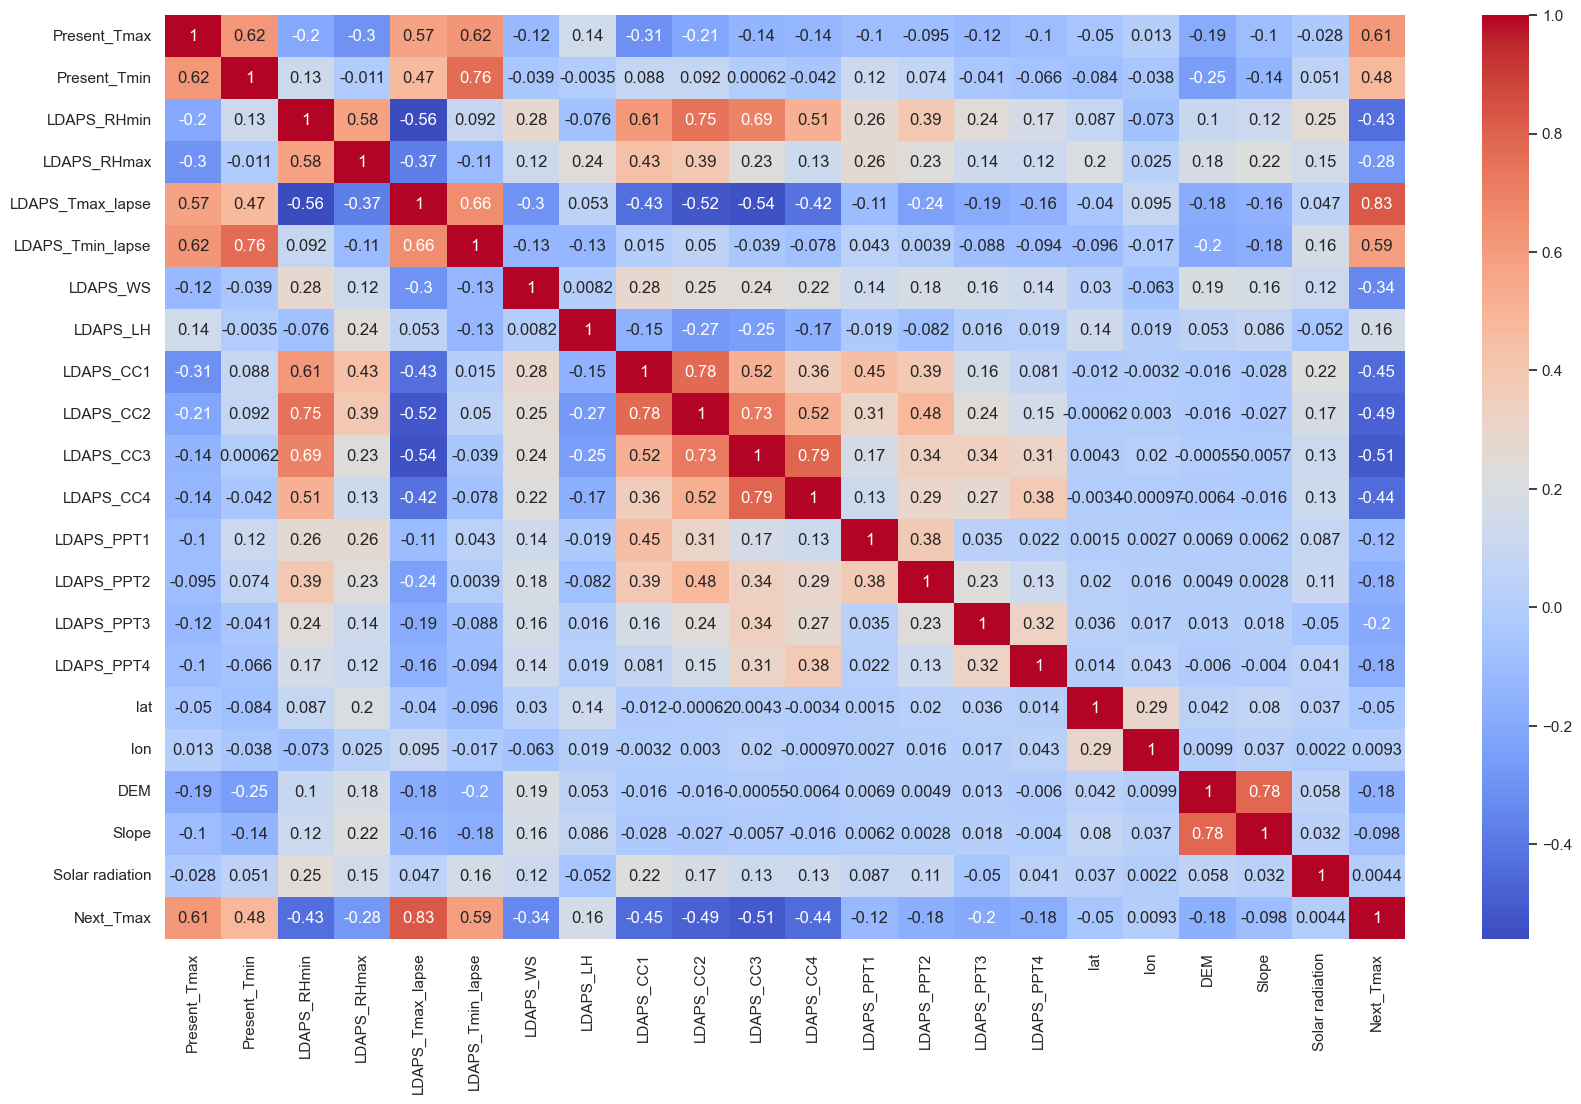

In [58]:
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap ='coolwarm')
plt.show()

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
selected_features = [
    'LDAPS_Tmax_lapse',  
    'Present_Tmax',      
    'LDAPS_Tmin_lapse',  
    'Solar radiation', 
    'DEM'            
]

In [62]:
from sklearn.model_selection import train_test_split
X = df_train[selected_features]
y = df_train['Next_Tmax']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5271, 5), (1318, 5), (5271,), (1318,))

In [65]:
poly = PolynomialFeatures(degree = 2)
X_train_pol = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [67]:
print(f"Original shape: {X_train.shape}, Polynomial shape: {X_train_poly.shape}")

Original shape: (5271, 5), Polynomial shape: (5271, 21)


In [71]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)

LinearRegression()

In [73]:
y_train_pred = poly_reg.predict(X_train_poly)
print("Polynomial Regression (degree=2) Training Performance:")
print(f"R2 Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")

Polynomial Regression (degree=2) Training Performance:
R2 Score: 0.7230
RMSE: 1.6499


In [74]:
y_test_pred = poly_reg.predict(X_test_poly)
print("Polynomial Regression (degree=2) Test Performance:")
print(f"R2 Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")


Polynomial Regression (degree=2) Test Performance:
R2 Score: 0.7290
RMSE: 1.6109


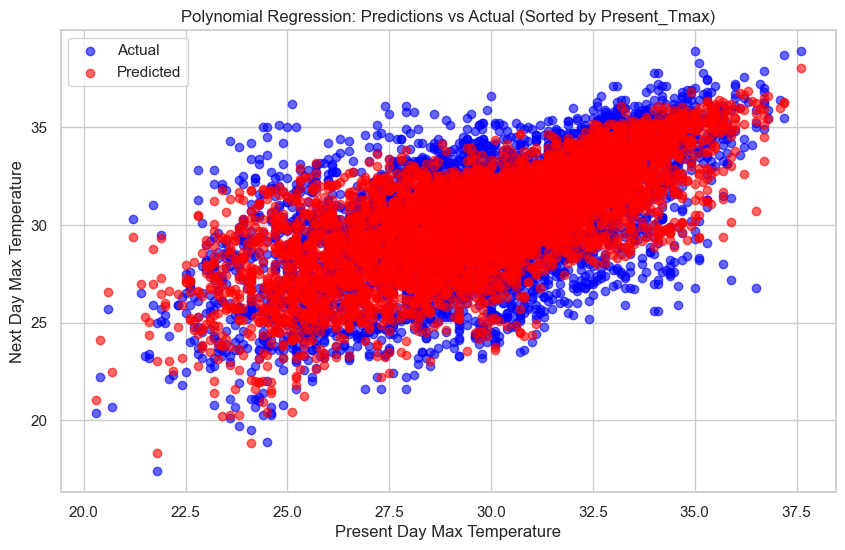

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

plot_df = X_train.copy()
plot_df['Actual'] = y_train
plot_df['Predicted'] = y_train_pred
plot_df_sorted = plot_df.sort_values(by='Present_Tmax')

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(plot_df_sorted['Present_Tmax'], plot_df_sorted['Actual'], color='blue', label='Actual', alpha=0.6)
plt.scatter(plot_df_sorted['Present_Tmax'], plot_df_sorted['Predicted'], color='red', label='Predicted', alpha=0.6)

plt.title('Polynomial Regression: Predictions vs Actual (Sorted by Present_Tmax)')
plt.xlabel('Present Day Max Temperature')
plt.ylabel('Next Day Max Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
print("Linear Regression Performance:")
print(f"Train R2: {r2_score(y_train, y_lin_train):.4f}, Test R2: {r2_score(y_test, y_lin_test):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_lin_train)):.4f}, Test RMSE: {np.sqrt(mean_squared_error(y_test, y_lin_test)):.4f}")

print("\nPolynomial Regression (degree=2) Performance:")
print(f"Train R2: {r2_score(y_train, y_train_pred):.4f}, Test R2: {r2_score(y_test, y_poly_test):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}, Test RMSE: {np.sqrt(mean_squared_error(y_test, y_poly_test)):.4f}")


Linear Regression Performance:
Train R2: 0.7115, Test R2: 0.7185
Train RMSE: 1.6838, Test RMSE: 1.6418

Polynomial Regression (degree=2) Performance:
Train R2: 0.7230, Test R2: 0.7290
Train RMSE: 1.6499, Test RMSE: 1.6109


Degree 1: Mean RMSE = 1.6762 (+/- 0.0414)
Degree 2: Mean RMSE = 1.6464 (+/- 0.0382)
Degree 3: Mean RMSE = 1.6229 (+/- 0.0362)
Degree 4: Mean RMSE = 1.6264 (+/- 0.0385)

Optimal polynomial degree: 3


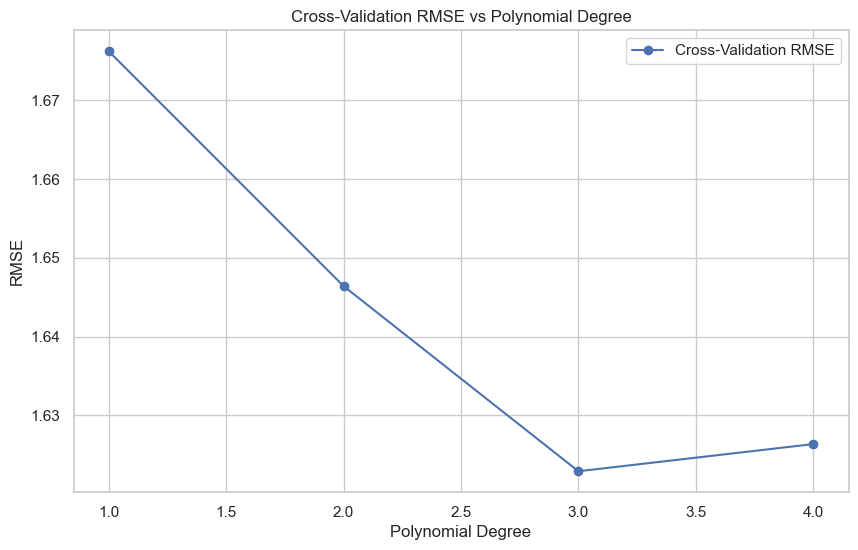

In [79]:
from sklearn.model_selection import cross_val_score
degrees = [1, 2, 3, 4]
cv_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cv_scores.append(rmse_scores.mean())
    
    print(f"Degree {degree}: Mean RMSE = {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    
optimal_degree = degrees[np.argmin(cv_scores)]
print(f"\nOptimal polynomial degree: {optimal_degree}")
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, marker='o', color='b', label='Cross-Validation RMSE')
plt.title('Cross-Validation RMSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()


## Discussion on Model Complexity

1. **Baseline Performance with Linear Model**:  
   The **linear model (degree=1)** is simple and offers a baseline performance. While it works well for linear relationships, it may miss non-linear patterns that can be crucial in more complex datasets.

2. **Non-linear Relationships with Polynomial Features**:  
   **Polynomial features (degree=2)** enable the model to capture **non-linear relationships** between features and the target. This can lead to better performance in cases where simple linear relationships aren't sufficient (e.g., temperature prediction).

3. **Overfitting with Higher Degrees**:  
   **Higher polynomial degrees (degree=3 and above)** can significantly increase model complexity, which may lead to **overfitting**. In overfitting, the model memorizes the training data too well, losing its ability to generalize to unseen data. This is especially problematic if the dataset is limited or noisy.

4. **Optimal Polynomial Degree Selection**:  
   Based on **cross-validation results**, the **optimal polynomial degree** strikes the best balance between **bias** (error due to overly simplistic models) and **variance** (error due to overly complex models). The cross-validation scores give us a reliable indication of the **degree that generalizes best** to new data.

5. **Quadratic Relationships in Temperature Prediction**:  
   **Degree 2** often works well for tasks like **temperature prediction**, as weather patterns can exhibit **quadratic relationships**. Many meteorological phenomena are influenced by non-linear interactions (e.g., maximum temperature variation may follow a curvilinear pattern across time).

6. **Further Model Refinements**:  
   If higher polynomial degrees are considered, **regularization techniques** (like Ridge or Lasso) can be helpful in preventing **overfitting** by penalizing overly large coefficients. Additionally, further **feature selection** could help focus on the most relevant predictors, avoiding unnecessary complexity in the model.